In [3]:
!unzip spotify_data.zip -d data

Archive:  spotify_data.zip
  inflating: data/spotify_data.csv   


In [7]:
import pandas as pd
import numpy as np
import datetime
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/spotify_data.csv')

In [4]:
df.index = df['id']
df = df.drop(columns='id')

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
print(df.shape)
df.head()

(170653, 18)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
id,,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921-01-01,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921-01-01,0.4150,60.936
1o6I8BglA6ylDMrIELygv1,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921-01-01,0.0339,110.339
3ftBPsC5vPBKxYSee08FDH,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921-01-01,0.0354,100.109
4d6HGyGT8e121BsdKmw9v6,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921-01-01,0.0380,101.665


In [ ]:
df.describe(exclude=np.number)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170653 entries, 4BJqT0PrAfrxzMOxytFOIz to 7HmnJHfs0BkFzX4x8j0hkl
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   valence           170653 non-null  float64       
 1   year              170653 non-null  int64         
 2   acousticness      170653 non-null  float64       
 3   artists           170653 non-null  object        
 4   danceability      170653 non-null  float64       
 5   duration_ms       170653 non-null  int64         
 6   energy            170653 non-null  float64       
 7   explicit          170653 non-null  int64         
 8   instrumentalness  170653 non-null  float64       
 9   key               170653 non-null  int64         
 10  liveness          170653 non-null  float64       
 11  loudness          170653 non-null  float64       
 12  mode              170653 non-null  int64         
 13  name              170653 no

In [ ]:
df.nunique()

In [12]:
features = df.drop(columns=['artists', 'name', 'release_date'])

In [13]:
test = features.iloc[[8009]]
song_name = df.iloc[8009]['name']
print(song_name)
test

Stand by Me


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
id,,,,,,,,,,,,,,,
3SdTKo2uVsxFblQjpScoHy,0.605,1962,0.57,0.65,180056,0.306,0,0.000007,9,0.0707,-9.443,1,78,0.0393,118.068


In [14]:
nn = NearestNeighbors(n_neighbors=10, algorithm = 'brute')
nn.fit(features)

NearestNeighbors(algorithm='brute', n_neighbors=10)

In [15]:
neighbors = nn.kneighbors(test)

In [16]:
df.iloc[neighbors[1][0][1:]]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
id,,,,,,,,,,,,,,,,,,
4mKlzy0qaK1c2Qw5e2VqpF,0.580,1981,0.339000,['Queen'],0.564,180067,0.560,0,0.000000,10,0.0781,-9.797,1,Killer Queen,60,1981-10-26,0.0423,117.170
1hHGUdFaiJHw9hVZGJWYO2,0.680,1970,0.209000,['Allman Brothers Band'],0.585,180067,0.532,0,0.007970,7,0.2270,-9.673,1,Midnight Rider,70,1970-09-18,0.0268,94.461
7kv7zBjMtVf0eIJle2VZxn,0.850,1977,0.098900,['Glen Campbell'],0.697,180027,0.813,0,0.023200,11,0.5830,-8.890,0,Southern Nights,69,1977-01-01,0.0315,95.301
3yMFBuIdPBdJkkzaPBDjKY,0.349,1994,0.002040,['Hole'],0.331,180067,0.722,0,0.000054,7,0.2560,-8.461,1,Miss World,50,1994-01-01,0.0408,125.575
0vRlpKpHowoQOgn3dbm55X,0.457,1957,0.903000,"[""Anita O'Day"", 'Oscar Peterson Quartet']",0.554,180040,0.256,0,0.000000,7,0.1060,-16.729,1,'S Wonderful / They Can't Take That Away From Me,36,1957-01-01,0.0824,115.824
2t52iAf0e5jf1rzrB2uguz,0.235,1975,0.000013,['Amanaz'],0.492,180063,0.620,0,0.013500,8,0.0981,-10.975,0,History Of Man,34,1975-01-01,0.0363,115.669
1KPMTL3BRLBWrNY8fveVy6,0.579,1974,0.297000,['Queen'],0.562,180027,0.494,0,0.000000,10,0.0685,-11.523,1,Killer Queen,43,1974-11-08,0.0421,117.129
3NN4WPApckHyTZ6pPoRRWc,0.680,1964,0.654000,['Frankie Valli & The Four Seasons'],0.481,180067,0.477,0,0.000015,10,0.0761,-8.961,1,Rag Doll,31,1964-07-01,0.0303,122.369
3T37jKtvQzNExmz3DuQNoz,0.498,1977,0.068800,['Jan Hammer Group'],0.656,180078,0.792,0,0.654000,2,0.0910,-7.121,1,Don't You Know,46,1977-10-17,0.0478,93.804


In [ ]:
for index in neighbors[1][0][1:]:
    print(df.iloc[[index]][['name', 'artists']])

In [17]:
neighbors

(array([[ 0.        , 28.42635548, 28.47032213, 40.88332625, 44.62080949,
         45.90499907, 46.52621324, 47.0778762 , 48.51599247, 48.75510697]]),
 array([[ 8009, 11838,  9616, 11026, 33514, 26064, 83381, 10562, 27505,
         48648]]))

In [110]:
nn.kneighbors_graph(test).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

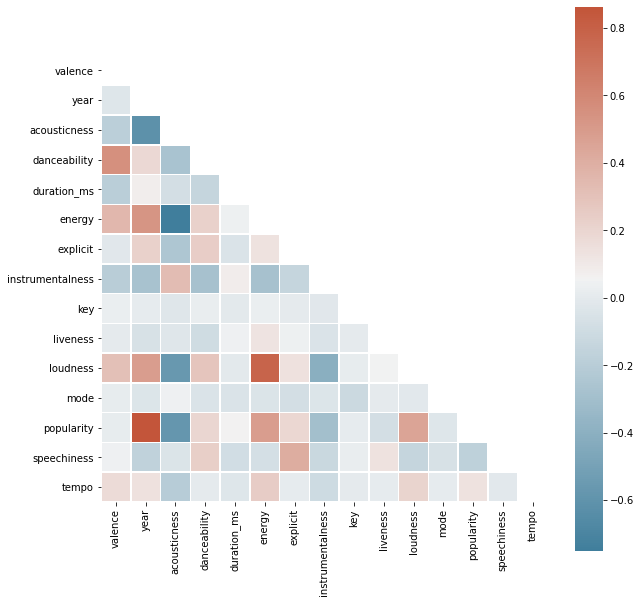

In [24]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=0.5, square=True)
plt.show();